# Tensorflow CNN Multi-Category Image Classification - Exercises

Dataset:
- https://www.kaggle.com/datasets/gpiosenka/balls-image-classification

### Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import tensorflow as tf

from zipfile import ZipFile

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, classification_report

# Import and Unzip the Dataset from Kaggle

Connect to Kaggle and then download the dataset

- https://stackoverflow.com/questions/56816537/cant-find-kaggle-json-file-in-google-colab

- Unzip the dataset

In [3]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"username","key":"api-key"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d gpiosenka/balls-image-classification

 88% 162M/183M [00:01<00:00, 168MB/s]
100% 183M/183M [00:01<00:00, 137MB/s]


In [5]:
uz = ZipFile('balls-image-classification.zip')
uz.extractall()
uz.close()

### Data Exploration

- How many different categories are there?
- How many files per category?
- How many files in total?
- What is the shape of the files?
- Plot a few images from random categories

In [7]:
total = 0
for dirs, fols, files in os.walk('train'):
  print(f'{dirs}, {len(fols)}, {len(files)}')
  total += len(files)
print(total)

train, 26, 0
train/paint balls, 0, 32
train/basketball, 0, 116
train/wrecking ball, 0, 69
train/tether ball, 0, 105
train/cannon ball, 0, 183
train/brass, 0, 113
train/marble, 0, 131
train/baseball, 0, 112
train/bowling ball, 0, 145
train/puffballs, 0, 106
train/soccer ball, 0, 167
train/football, 0, 112
train/cricket ball, 0, 150
train/meat ball, 0, 137
train/wiffle ball, 0, 99
train/beachballs, 0, 92
train/buckeyballs, 0, 82
train/medicine ball, 0, 77
train/screwballs, 0, 140
train/billiard ball, 0, 143
train/water polo ball, 0, 139
train/eyeballs, 0, 139
train/golf ball, 0, 106
train/volley ball, 0, 131
train/tennis ball, 0, 139
train/pokeman balls, 0, 86
3051


In [8]:
print(3051/26)

117.34615384615384


In [12]:
print(117/3051)

0.038348082595870206


035.jpg
(224, 224, 3)


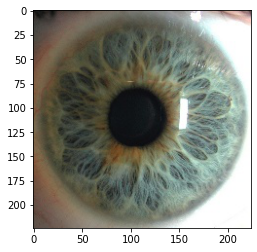

In [30]:
path = 'train/'
category = 'eyeballs/'
target = path + category

image = random.choice(os.listdir(target))

print(image)

img = mpimage.imread(target + image)
print(img.shape)

plt.imshow(img)

### Normalize and Batch the Data

- Rescale the Data

- Split the data into batches
- Class Mode: `categorical`
- Target Size: 224,224
- All other default values can remain

In [32]:
train_dir = 'train'
test_dir = 'test'

train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

train_data = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    class_mode='categorical'
)


test_data = test_data_gen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    class_mode='categorical'
)


Found 3051 images belonging to 26 classes.
Found 130 images belonging to 26 classes.


### Model Creation

Create the model from the CNN Explainer
- https://poloclub.github.io/cnn-explainer/

For the final output layer
- Units: Number of categories
- Activation: `softmax`

Compile Layer Loss: `categorical_crossentropy`

Optional:
Build the model before fitting and explore the summary


In [34]:
model_1 = Sequential()

model_1.add(Conv2D(128, 3, activation='relu', input_shape=(224,224,3)))
model_1.add(Conv2D(128, 3, activation='relu'))
model_1.add(MaxPool2D())

model_1.add(Conv2D(128, 3, activation='relu'))
model_1.add(Conv2D(128, 3, activation='relu'))
model_1.add(MaxPool2D())

model_1.add(Flatten())

model_1.add(Dense(26, activation='softmax'))

model_1.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    train_data,
    validation_data=test_data,
    epochs=5
)


Epoch 1/5
96/96 [==============================] - 55s 399ms/step - loss: 3.0148 - accuracy: 0.2121 - val_loss: 2.3115 - val_accuracy: 0.3692
Epoch 2/5
96/96 [==============================] - 36s 370ms/step - loss: 1.7365 - accuracy: 0.5156 - val_loss: 1.7366 - val_accuracy: 0.5846
Epoch 3/5
96/96 [==============================] - 37s 380ms/step - loss: 0.8349 - accuracy: 0.7699 - val_loss: 2.1192 - val_accuracy: 0.4846
Epoch 4/5
96/96 [==============================] - 36s 378ms/step - loss: 0.3591 - accuracy: 0.8971 - val_loss: 2.5263 - val_accuracy: 0.4308
Epoch 5/5
96/96 [==============================] - 36s 379ms/step - loss: 0.1859 - accuracy: 0.9528 - val_loss: 2.8593 - val_accuracy: 0.5231


### Model Analysis

Plot the Loss/Accuracy Curves

Was this over or under fit?

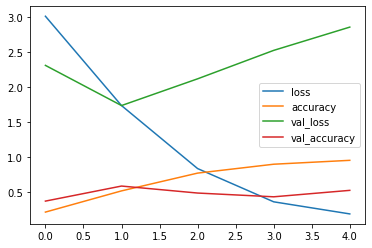

In [35]:
pd.DataFrame(history_1.history).plot()

### Data Augmentation

Let's introduce Data Augmentation
- Create a new training dataset with augmented data
- Choose the parameters you want to change


In [45]:

train_data_gen = ImageDataGenerator(rescale=1./255)
train_data_aug_gen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True
    )

train_data = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    class_mode='categorical',
    shuffle=True
)

train_data_aug = train_data_aug_gen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    class_mode='categorical',
    shuffle=True
)




Found 3051 images belonging to 26 classes.
Found 3051 images belonging to 26 classes.


In [37]:
image, label = train_data.next()
image_aug, label_aug = train_data_aug.next()

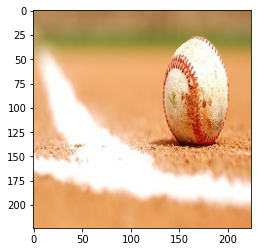

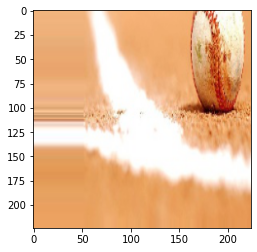

In [44]:
plt.imshow(image[2])
plt.figure()
plt.imshow(image_aug[2])

### Model 2

- Create the same model structure as above but this time fit with the augmented data

In [46]:
model_2 = Sequential()

model_2.add(Conv2D(128, 3, activation='relu', input_shape=(224,224,3)))
model_2.add(Conv2D(128, 3, activation='relu'))
model_2.add(MaxPool2D())

model_2.add(Conv2D(128, 3, activation='relu'))
model_2.add(Conv2D(128, 3, activation='relu'))
model_2.add(MaxPool2D())


model_2.add(Flatten())

model_2.add(Dense(26, activation='softmax'))

model_2.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    train_data_aug,
    validation_data=test_data,
    epochs=5
)

Epoch 1/5
96/96 [==============================] - 51s 528ms/step - loss: 3.2298 - accuracy: 0.1010 - val_loss: 2.9311 - val_accuracy: 0.1923
Epoch 2/5
96/96 [==============================] - 50s 522ms/step - loss: 2.7502 - accuracy: 0.2255 - val_loss: 2.2680 - val_accuracy: 0.3385
Epoch 3/5
96/96 [==============================] - 51s 532ms/step - loss: 2.3178 - accuracy: 0.3337 - val_loss: 2.0498 - val_accuracy: 0.4231
Epoch 4/5
96/96 [==============================] - 50s 523ms/step - loss: 2.1092 - accuracy: 0.3995 - val_loss: 1.9259 - val_accuracy: 0.4615
Epoch 5/5
96/96 [==============================] - 51s 530ms/step - loss: 1.9934 - accuracy: 0.4428 - val_loss: 1.7994 - val_accuracy: 0.4462


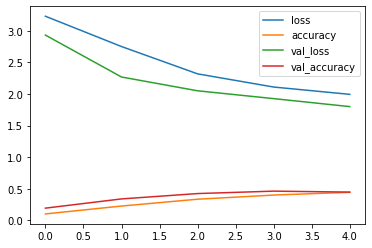

In [47]:
pd.DataFrame(history_2.history).plot()

### Run Predictions

- Run a prediction on a Single Image from the test set
- Run predictions on all images from the test set
 - Create a function
 - Save results in y_true and predictions
- Run y_test and predictions through the confusion_matrix and classification_report

In [48]:
model_1.evaluate(test_data)

5/5 [==============================] - 1s 110ms/step - loss: 2.8593 - accuracy: 0.5231


[2.859254837036133, 0.5230769515037537]

In [49]:
model_2.evaluate(test_data)

5/5 [==============================] - 1s 113ms/step - loss: 1.7994 - accuracy: 0.4462


[1.7993919849395752, 0.446153849363327]

array([11])

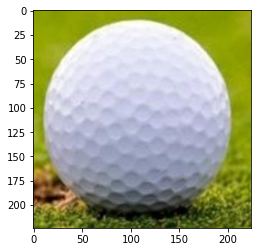

In [61]:
path = 'test/'
category='golf ball/'

target = path + category

image = random.choice(os.listdir(target))

img = tf.io.read_file(target + image)
img = tf.io.decode_image(img)
plt.imshow(img)
img = tf.image.resize(img, [224,224])
img = img/255.
img = tf.expand_dims(img, axis=0)

np.argmax(model_1.predict(img), axis=1)



In [50]:
test_data.class_indices

{'baseball': 0,
 'basketball': 1,
 'beachballs': 2,
 'billiard ball': 3,
 'bowling ball': 4,
 'brass': 5,
 'buckeyballs': 6,
 'cannon ball': 7,
 'cricket ball': 8,
 'eyeballs': 9,
 'football': 10,
 'golf ball': 11,
 'marble': 12,
 'meat ball': 13,
 'medicine ball': 14,
 'paint balls': 15,
 'pokeman balls': 16,
 'puffballs': 17,
 'screwballs': 18,
 'soccer ball': 19,
 'tennis ball': 20,
 'tether ball': 21,
 'volley ball': 22,
 'water polo ball': 23,
 'wiffle ball': 24,
 'wrecking ball': 25}

In [84]:
y_true_2 = []
predictions_2 = []

def predictor(path, image, model):
  target = path + '/' + image
  print(target)
  category = path.split('/')[1]

  img = tf.io.read_file(target)
  img = tf.io.decode_image(img)
  img = tf.image.resize(img, [224,224])
  img = img/255.
  img = tf.expand_dims(img, axis=0)

  pred = np.argmax(model.predict(img), axis=1)
  predictions_2.append(pred[0])

  if category in test_data.class_indices.keys():
    y_true_2.append(test_data.class_indices[category])

In [85]:
for dirs, fols, files in os.walk('test'):
  if len(fols) < 1:
    for file in files:
      predictor(dirs, file, model_2)

test/paint balls/2.jpg
test/paint balls/3.jpg
test/paint balls/1.jpg
test/paint balls/5.jpg
test/paint balls/4.jpg
test/basketball/2.jpg
test/basketball/3.jpg
test/basketball/1.jpg
test/basketball/5.jpg
test/basketball/4.jpg
test/wrecking ball/2.jpg
test/wrecking ball/3.jpg
test/wrecking ball/1.jpg
test/wrecking ball/5.jpg
test/wrecking ball/4.jpg
test/tether ball/2.jpg
test/tether ball/3.jpg
test/tether ball/1.jpg
test/tether ball/5.jpg
test/tether ball/4.jpg
test/cannon ball/2.jpg
test/cannon ball/3.jpg
test/cannon ball/1.jpg
test/cannon ball/5.jpg
test/cannon ball/4.jpg
test/brass/2.jpg
test/brass/3.jpg
test/brass/1.jpg
test/brass/5.jpg
test/brass/4.jpg
test/marble/2.jpg
test/marble/3.jpg
test/marble/1.jpg
test/marble/5.jpg
test/marble/4.jpg
test/baseball/2.jpg
test/baseball/3.jpg
test/baseball/1.jpg
test/baseball/5.jpg
test/baseball/4.jpg
test/bowling ball/2.jpg
test/bowling ball/3.jpg
test/bowling ball/1.jpg
test/bowling ball/5.jpg
test/bowling ball/4.jpg
test/puffballs/2.jpg
test

In [71]:
set(y_true) == set(predictions)

True

In [72]:
len(y_true) == len(predictions)

True

In [73]:
len(y_true)

130

In [74]:
print(confusion_matrix(y_true, predictions))
print(classification_report(y_true, predictions))

[[1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 2 0]
 [0 0 0 0 

In [75]:
test_data.class_indices

{'baseball': 0,
 'basketball': 1,
 'beachballs': 2,
 'billiard ball': 3,
 'bowling ball': 4,
 'brass': 5,
 'buckeyballs': 6,
 'cannon ball': 7,
 'cricket ball': 8,
 'eyeballs': 9,
 'football': 10,
 'golf ball': 11,
 'marble': 12,
 'meat ball': 13,
 'medicine ball': 14,
 'paint balls': 15,
 'pokeman balls': 16,
 'puffballs': 17,
 'screwballs': 18,
 'soccer ball': 19,
 'tennis ball': 20,
 'tether ball': 21,
 'volley ball': 22,
 'water polo ball': 23,
 'wiffle ball': 24,
 'wrecking ball': 25}

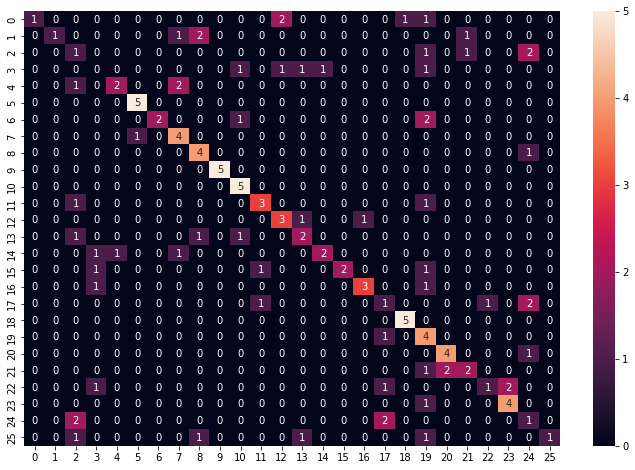

In [77]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_true, predictions), annot=True)

In [86]:
print(confusion_matrix(y_true_2, predictions_2))
print(classification_report(y_true_2, predictions_2))

[[1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 3 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 1 0 3 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
set(y_true_2) == set(predictions_2)

True

In [82]:
len(y_true_2) == len(predictions_2)

True